In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

In [2]:
%%capture
nltk.download('punkt') # Download for tokenization
nltk.download('stopwords') # Download stopwords
nltk.download('wordnet') # Download for lemmatization

sns.set_style('white')
plt.rcParams['figure.figsize'] = (9, 9)
plt.rcParams['date.autoformatter.day'] = '%d-%b'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
!gdown 1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u

Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 20.1MB/s]


In [4]:
!ls

flipitnews-data.csv  sample_data


In [5]:
df= pd.read_csv('flipitnews-data.csv')

<Axes: xlabel='Category'>

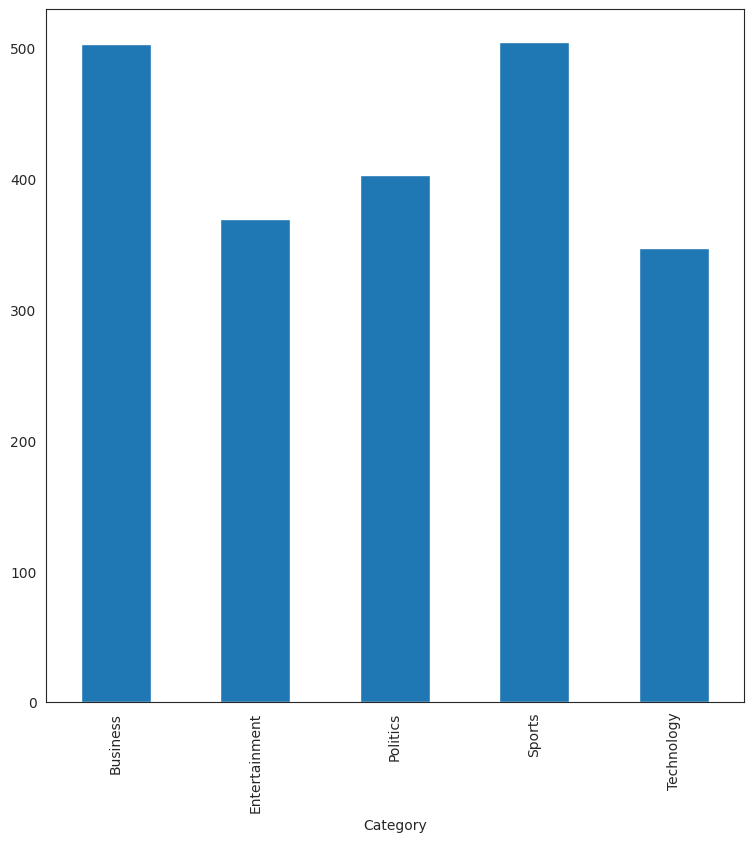

In [6]:
df= df.drop_duplicates()
df.groupby('Category').size().plot(kind='bar')

In [9]:
def preprocess_text(text):
  # Remove non-letters
  text = re.sub(r'[^a-zA-Z\s]',
  ''
  , text)
  # Tokenize
  tokens = nltk.word_tokenize(text.lower()) # Lowercase for consistency
  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  # Lemmatize
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  # Join back into a string
  return ' '.join(tokens)

In [10]:
df['Processed_Articles'] = df['Article'].apply(preprocess_text)

In [13]:
le = LabelEncoder()
df['encoded_target'] = le.fit_transform(df['Category'])

In [14]:
def vectorize_articles(df, column_name, method='tfidf'):
  if method == 'tfidf':
    vectorizer = TfidfVectorizer()
  elif method == 'bow':
    vectorizer = CountVectorizer()
  else:
    raise ValueError("Invalid method. Choose between 'tfidf' or 'bow'.")
  return vectorizer.fit_transform(df[column_name])

In [15]:
bow_articles = vectorize_articles(df, 'Processed_Articles', method= 'bow')
tfidf_articles = vectorize_articles(df, 'Processed_Articles', method= 'tfidf')
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    bow_articles,
    df['encoded_target'],
    test_size=0.2,
    random_state=42,
    stratify= df['encoded_target'] # Stratify based on target variable
)

In [16]:
# Fit the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_bow, y_train_bow)
# Make predictions on the test set
y_pred_bow = model.predict(X_test_bow)
# Evaluate the model
accuracy = accuracy_score(y_test_bow, y_pred_bow)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test_bow, y_pred_bow))

Accuracy: 0.9741784037558685
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       101
           1       0.99      0.96      0.97        74
           2       0.99      0.98      0.98        81
           3       1.00      1.00      1.00       101
           4       0.93      0.97      0.95        69

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426



In [17]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
tfidf_articles,
df['encoded_target'],
test_size=0.2,
random_state=42,
stratify= df['encoded_target'] # Stratify based on target variable
)
# Fit the Naive Bayes model for TF-IDF vectorised data
model = MultinomialNB()
model.fit(X_train_tfidf, y_train_tfidf)
# Make predictions on the test set
y_pred_tfidf = model.predict(X_test_tfidf)
# Evaluate the model
accuracy = accuracy_score(y_test_tfidf, y_pred_tfidf)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf))

Accuracy: 0.9530516431924883
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       101
           1       1.00      0.89      0.94        74
           2       0.94      0.98      0.96        81
           3       0.97      1.00      0.99       101
           4       1.00      0.86      0.92        69

    accuracy                           0.95       426
   macro avg       0.96      0.94      0.95       426
weighted avg       0.96      0.95      0.95       426



In [20]:
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
  # Fit the model
  model.fit(X_train, y_train)
  # Make predictions on the test set
  y_pred = model.predict(X_test)
  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  classification_report_ = classification_report(y_test, y_pred)
  # Return evaluation metrics
  return {'accuracy': accuracy, 'classification_report': classification_report_}

In [21]:
decision_tree_bow = train_evaluate_model(DecisionTreeClassifier(), X_train_bow, X_test_bow, y_train_bow, y_test_bow)
accuracy_bow = decision_tree_bow['accuracy']
classification_report_bow = decision_tree_bow['classification_report']
print(accuracy_bow)
print(classification_report_bow)

0.8380281690140845
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       101
           1       0.80      0.77      0.79        74
           2       0.88      0.81      0.85        81
           3       0.90      0.92      0.91       101
           4       0.81      0.70      0.75        69

    accuracy                           0.84       426
   macro avg       0.84      0.82      0.83       426
weighted avg       0.84      0.84      0.84       426



In [25]:
decision_tree_tfidf = train_evaluate_model(DecisionTreeClassifier(), X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)
accuracy_tfidf = decision_tree_tfidf['accuracy']
classification_report_tfidf = decision_tree_tfidf['classification_report']
print(accuracy_tfidf)
print(classification_report_tfidf)

0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       101
           1       0.75      0.84      0.79        74
           2       0.94      0.78      0.85        81
           3       0.88      0.90      0.89       101
           4       0.79      0.72      0.76        69

    accuracy                           0.83       426
   macro avg       0.83      0.82      0.83       426
weighted avg       0.84      0.83      0.83       426



In [26]:
random_forest_bow = train_evaluate_model(RandomForestClassifier(), X_train_bow, X_test_bow, y_train_bow, y_test_bow)
accuracy_bow = random_forest_bow['accuracy']
classification_report_bow = random_forest_bow['classification_report']

In [27]:
print(accuracy_bow)
print(classification_report_bow)

0.960093896713615
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       101
           1       1.00      0.93      0.97        74
           2       1.00      0.95      0.97        81
           3       0.98      1.00      0.99       101
           4       0.98      0.90      0.94        69

    accuracy                           0.96       426
   macro avg       0.97      0.95      0.96       426
weighted avg       0.96      0.96      0.96       426



In [30]:
random_forest_tfidf = train_evaluate_model(RandomForestClassifier(), X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)
accuracy_tfidf = random_forest_tfidf['accuracy']
classification_report_tfidf = random_forest_tfidf['classification_report']
print(accuracy_tfidf)
print(classification_report_tfidf)

0.9553990610328639
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       101
           1       0.96      0.96      0.96        74
           2       1.00      0.91      0.95        81
           3       0.98      1.00      0.99       101
           4       0.97      0.91      0.94        69

    accuracy                           0.96       426
   macro avg       0.96      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426



In [31]:
knn_bow = train_evaluate_model(KNeighborsClassifier(), X_train_bow, X_test_bow, y_train_bow, y_test_bow)
accuracy_bow = knn_bow['accuracy']
classification_report_bow = knn_bow['classification_report']
print(accuracy_bow)
print(classification_report_bow)

0.6784037558685446
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       101
           1       0.89      0.53      0.66        74
           2       0.89      0.67      0.76        81
           3       0.47      1.00      0.64       101
           4       1.00      0.41      0.58        69

    accuracy                           0.68       426
   macro avg       0.82      0.65      0.68       426
weighted avg       0.80      0.68      0.68       426



In [32]:
knn_tfidf = train_evaluate_model(KNeighborsClassifier(), X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)
accuracy_tfidf = knn_tfidf['accuracy']
classification_report_tfidf = knn_tfidf['classification_report']
print(accuracy_tfidf)
print(classification_report_tfidf)

0.9530516431924883
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       101
           1       0.96      0.91      0.93        74
           2       0.92      0.98      0.95        81
           3       0.99      0.99      0.99       101
           4       0.94      0.94      0.94        69

    accuracy                           0.95       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.95      0.95      0.95       426

